In [1]:
#Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [2]:
import seaborn as sns

In [3]:
#Read happiness data
happy_full_df = pd.read_csv('world_happiness_report.csv')
happy_full_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
happy_full_df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

### EDA 

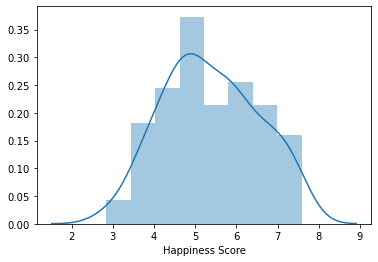

In [6]:
sns.distplot(happy_full_df['Happiness Score'])   #Distribution of the Target Variable

#### Corelation between Variables Region-wise 

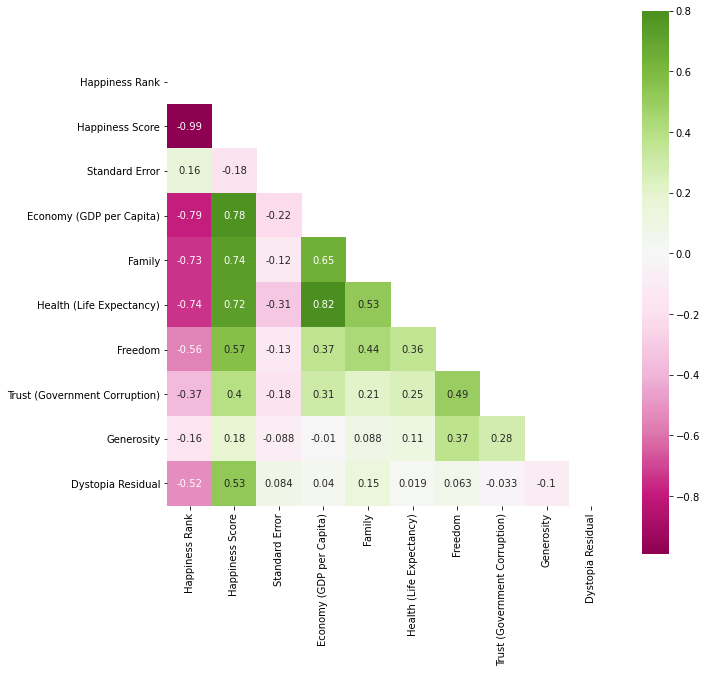

In [9]:
corrmat = happy_full_df.corr()   #for the entire world
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

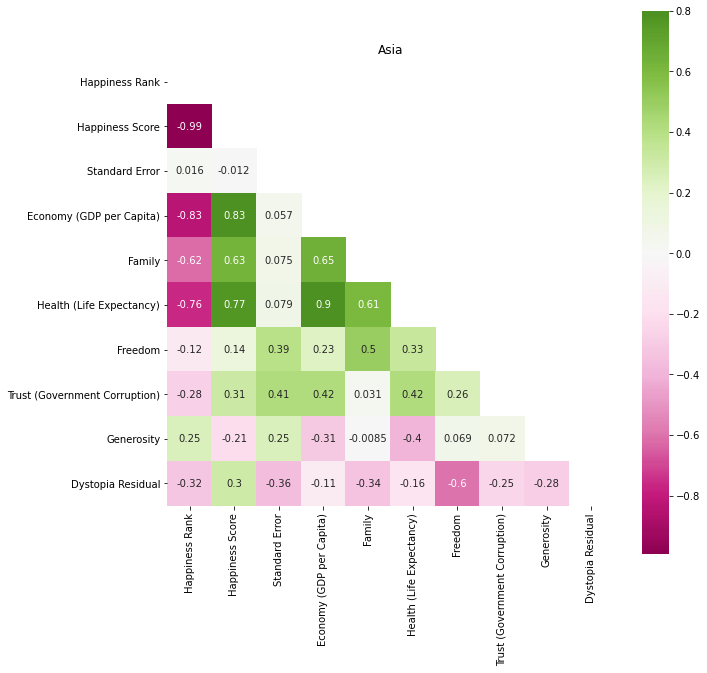

In [10]:
corrmat = happy_full_df[happy_full_df['Region'].str.contains('Asia')].corr()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title('Asia')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

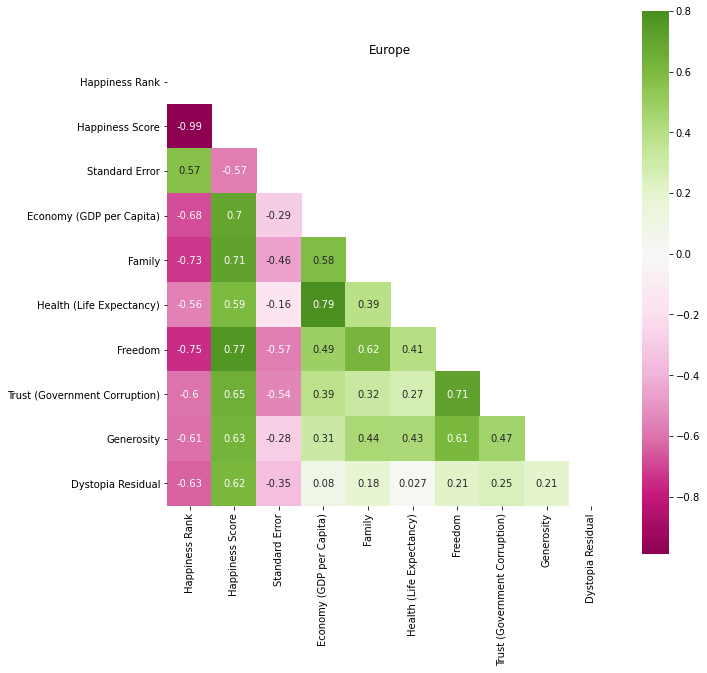

In [12]:
corrmat = happy_full_df[happy_full_df['Region'].str.contains('Europe')].corr()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title('Europe')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

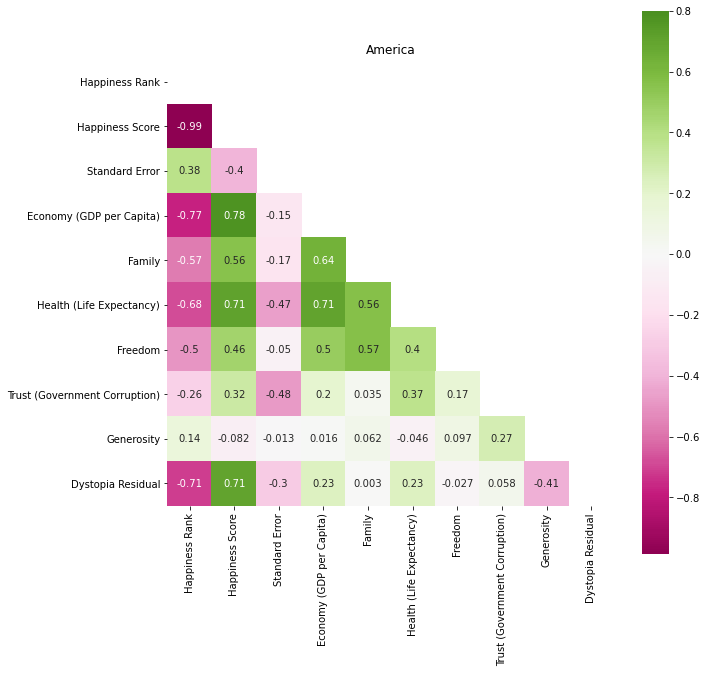

In [13]:
corrmat = happy_full_df[happy_full_df['Region'].str.contains('America')].corr()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title('America')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

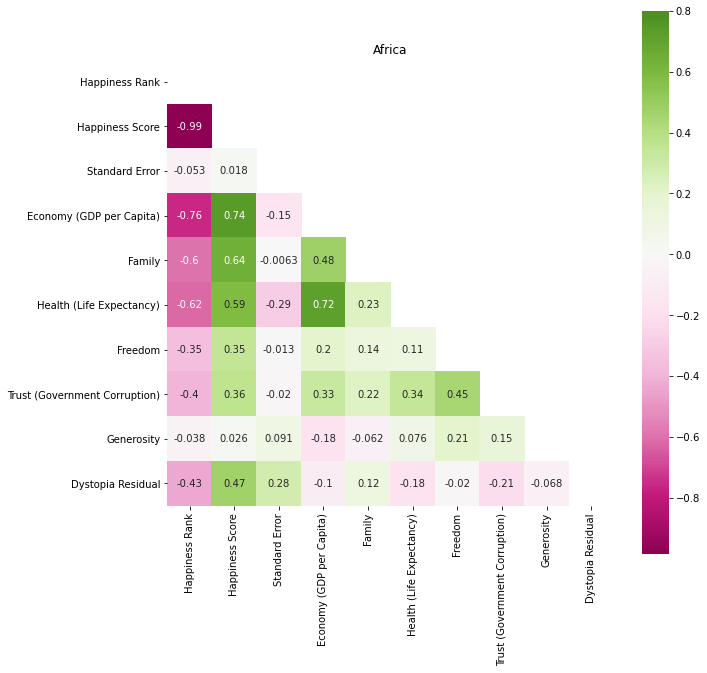

In [14]:
corrmat = happy_full_df[happy_full_df['Region'].str.contains('Africa')].corr()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_title('Africa')
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

### Analysis 

In [16]:
happy_full_df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [20]:
X = happy_full_df[['Happiness Rank','Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)']]

y = happy_full_df['Happiness Score'].values.reshape(-1, 1)

print(X.shape, y.shape)

(158, 7) (158, 1)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [24]:
print(model.intercept_)
print(model.coef_)

[7.21464155]
[[-0.0244341  -0.0345963   0.13143546 -0.08370477 -0.01147302  0.09239712
   0.31805783]]


In [25]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9855691915700792
Testing Score: 0.9849978148514686


Text(0.5, 1.0, 'Residual Plot')

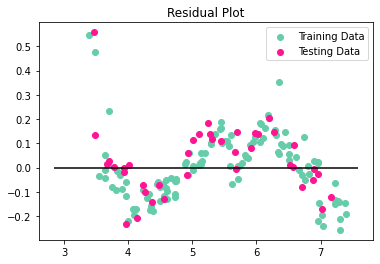

In [26]:
#printing model validation
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="mediumaquamarine", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="deeppink", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [27]:
predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f'MSE:{MSE},R2:{r2}')

MSE:0.01996606732702827,R2:0.9849978148514686


### Saving the Model

In [28]:
import joblib

# Saving the model as a pickle in a file
joblib.dump(model,"world_happiness.pkl")

['world_happiness.pkl']